<a href="https://colab.research.google.com/github/rileyseefeldt/MAT-422/blob/main/HW3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.3 Unconstrained Optimization

##3.3.1 Necessary and Suﬀicent Conditions of Local Minimizers

This section is focused on optimization of:

min
x∈Rd f (x),

Key Terms:

Global Minimizer:
The point a is a global minimizer of f: R->R if f(x)>=f(a) for all x in R.

Local Minimizer:
The point a is a local minimizer of f: R->R if there is a δ > 0 such that f(x)>=f(a) for all x in Bδ(a) \\ {x∗}.

Difference between local and global minimizers:

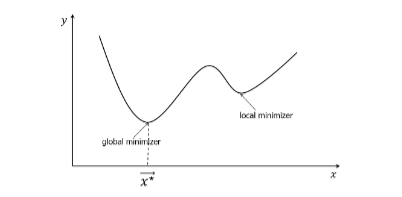

Descent Direction:
Let f: R->R. A vector v is a descent direction for f at a if there is a α > 0 such that

f(a + αv) < f(a) for all a in (0 , α)

Descent Direction and Directional Derivative:
Let f:R->R be continuously differentiable at a. A vector v is a descent direction for f at a if

∂f(x0) / ∂v = ∇f(x0)Tv < 0

First-Order necesary condition:
Let f: R->R be continuously differentialbe at on R. if a is a local minimizer, then ∇f(x0) = 0.

Second-Order necessary condition:
Let f R->R be twicce continiously differentiable on R. if x0 is a local minimizer, then the Hessian matrix of f  is positive semi-definite. (which means the matrix does not produce any negative curvature)

Second-Order sufficient Condition:
Let f R->R be twicce continiously differentiable on R. If ∇f(a) = 0 and the Heissan matrix of f is positive definite (which means the curvature of the matrix is strictly upward), then a is a struct local minimizer.



There is an extrema somewhere near x= 0 y = -2 True


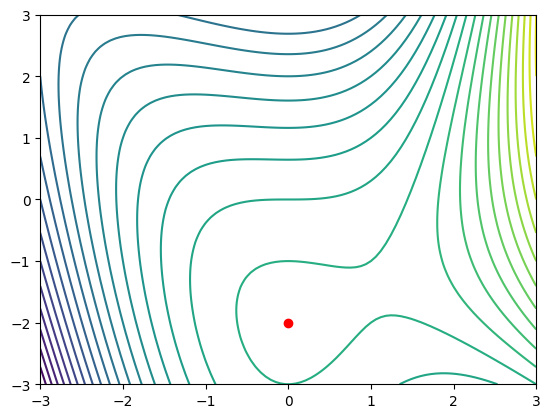

As expected, the graph shows a extrema at the value (0,-2)


In [66]:
#Example of minimizers

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def f(X): #represents the function x^3 -8y^2 +x^2y -y^2 - 4y #assume X[0] = x and X[1] = y
  return X[0]**3 + (X[0]**2) * X[1] - X[1]**2 - 4*X[1]

def j(X): #computes jacobian matrix of function by taking both first partial derivatives
  return np.array([3*(X[0]**2) +2*X[0]*X[1],X[0]**2 - 2*X[1] - 4]) #returns [∂f/∂x, ∂f/∂y]

def H(X): #computes heissen matrix of function by taking all second partial derivates of f
  return np.array([[6*X[0] + 2*X[1],2*X[0]],[2*X[0],-2]]) # returns [∂2f/∂x2, ∂2f/∂x∂y]
                                                          #         [∂2f/∂y∂x, ∂2f/∂y2]
guess_x = 0
guess_y = -2
initial_guess = [guess_x, guess_y]
result = minimize(f,initial_guess, jac = j, hess = H, method='trust-constr')
#this function uses the initial guess of x and y to find a minimum value of the f function
#it uses the jacobian(1st derivative) matrix and hess(2nd derivative) matrix to guide calcualtions
#true-constr indicates that the algorythm will use a trust-region constrained optimization method

print("There is an extrema somewhere near x=",guess_x, "y =", guess_y, result.success)

#prints if the calculation was a sucesss

x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
#creates 100 random x and y values between -3 and 3
X,Y = np.meshgrid(x,y)
input = [X,Y]
F = f(input)
#calcualtes the ouput of the function based on the input

plt.contour(X, Y, F, levels=30) #prints contour plot with 30 lines
plt.plot(result.x[0], result.x[1], 'ro')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()
print("As expected, the graph shows a extrema at the value (0,-2)")

##3.3.2 Convexity and Global Minimizers

Key Terms:

Convex function:
A function is considered convex if the line segment between any two points on the graph of the function lies above the graph between two points. More formally, f: R-R is convex if for all x,y∈D and all α exists in [0,1]

f((1 − α)x + αy) ≤ (1 − α) f(x) + αf(y).

Convex set:
A set D⊆R is convex if for all x,y∈D and all α exists in [0,1],

(1-α)x +αy exists in D.

Essentially means the line between any two x and y must also be in the set.

Global Minimizer sufficient condition for complex functions: Let f: R->R be continuously differentiable, convex function. If ∇f(a) = 0 then a is a global minimizer.

Additionally, any local minimizer of f is also a global minimizer of f.

f = x^2 is convex in the closed interval [-2, 2] : True
g = sin(x) is convex in the closed interval [-2, 2] : False


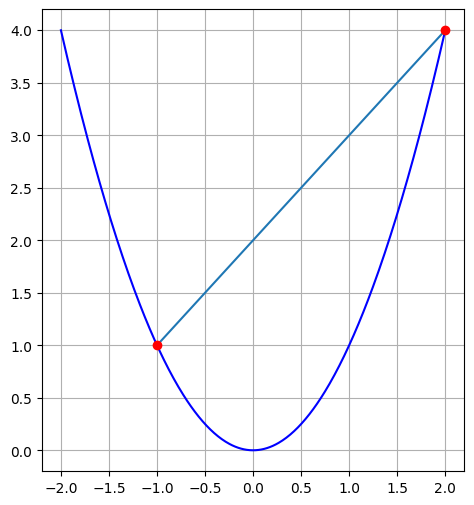

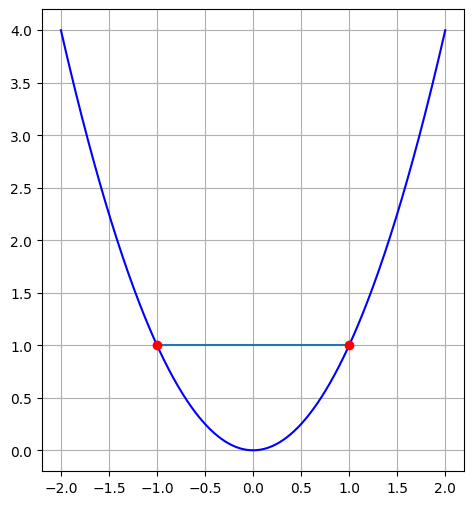

In [67]:
#convexity example
def fisConvex(f,X): #let X[0] = x and X[1] = y
  a = np.linspace(0,1,100)
  for i in a:
    f1 = f((1-i)*X[0] + i*X[1]) #calculates first side of inequality
    f2 = (1-i)*f(X[0]) + i*f(X[1]) #calculates second side of inequality
    if (f1>f2): #if inequality is false for any a returns false
      return False
  return True

def f(x):
  return x**2

def g(x):
  return np.sin(x)

X = [-2, 2]
print("f = x^2 is convex in the closed interval", X, ":", fisConvex(f, X))
print("g = sin(x) is convex in the closed interval", X, ":", fisConvex(g, X))

def graphConvex(f,x,y,I):#visualization of complexity
#f is the function
#x and y are two variables to create the line segment
#I is the interval in which f is convex
  if(fisConvex(f,I)):
    x_values = np.linspace(I[0], I[1], 400) #chossing 400 random x variables in given I interval
    x1 = x
    x2 = y
    y1 = f(x1)
    y2 = f(x2)
    #the line will be flotted between these two points defined in f

    m = (y2 - y1) / (x2 - x1)  # Slope of line
    line_segment_x = np.linspace(x1, x2, 100)  # x values for the line segment
    line_segment_f = m * (line_segment_x - x1) + y1  # y values for line segment

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(x_values, f(x_values), color='blue')
    plt.scatter([x1, x2], [y1, y2], color='red', zorder=5)
    plt.plot(line_segment_x, line_segment_f)
    plt.grid()
  else:
    print("F is not convex")

graphConvex(f,-1,2,X)
graphConvex(f,-1,1,X)


No matter what values we choose for x1 and x2 in I, the line between those two variables will stay inside the shape of the graph

##3.3.3 Gradient Descent

When we know a function has a minimum, Gradient descent is used for solving optimization problems. We must used Gradient Descent instead of another optimization method (like least squares) because systems of nonlinear equations do not have explicit solutions.

Key Terms:

Steepest Descent:
Let f:R->R be continuously differentiable at a, for any unit vector v exists in R

∂f(x0) / ∂v ≥ ∂f(x0) / ∂v∗

where

v∗ = −∇f(x0) / ∥∇ f (x0)∥.

Steepest Descent:
Suppose f:R->R is twice continuously differentiable. The step size is chosen to minimize

αk = arg minα>0 f(xk − α∇f(xk)).

Then the steepest descent started from any a produces a sequence xk, k = 1, 2 ... such that if ∇ f (xk) ̸ = 0, then

f(xk+1) ≤ f(xk), ∀k ≥ 1

Estimated min at x =  1.2909944487358056 of f(x) = -8.303314829119351 by gradient descent
path of algorythm [0, 0.5, 0.925, 1.1683125, 1.258826270703125, 1.2834331967594237, 1.2892729655961896, 1.2906055316510316, 1.2909067401525591, 1.2909746766211672, 1.290989991918029, 1.290993444148275, 1.2909942222981274, 1.2909943976959835, 1.290994437231259, 1.2909944461426424, 1.290994448151298, 1.2909944486040557, 1.2909944487061087, 1.2909944487291118, 1.2909944487342968, 1.2909944487354654, 1.290994448735729, 1.2909944487357883, 1.2909944487358016, 1.2909944487358047, 1.2909944487358054, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.2909944487358056, 1.290994448

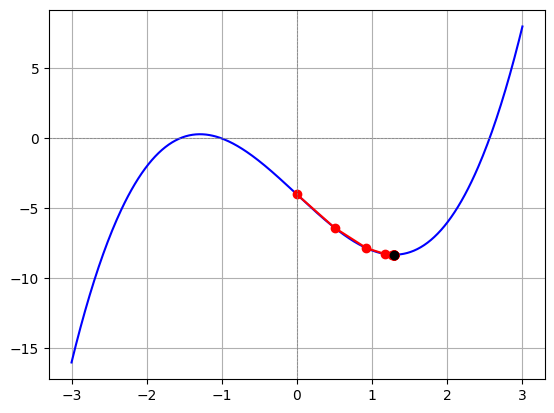

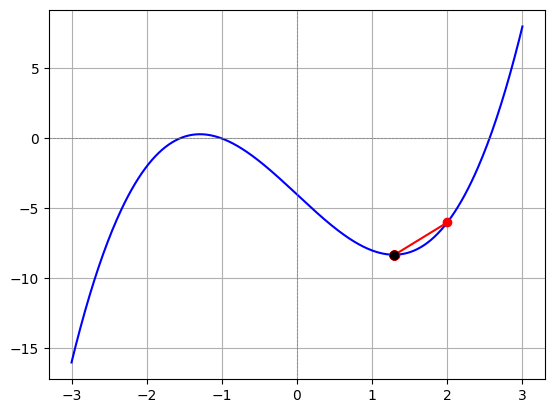

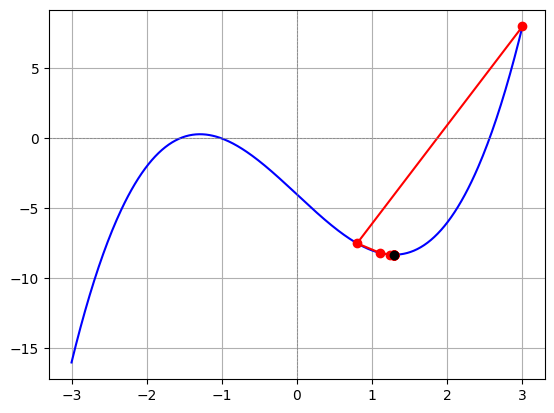

In [80]:
#Gradient Descent Example

def f(x):
  return x**3 - 5*x -4

def d(x):
  return 3*x**2 -5

def grad_descent(start, stepSize, steps):
  m = start #variable that represents the value of f(x)
  path = [m] #array which represents the path the algorythm took
  for _ in range(steps):
    m = m - stepSize * d(m) #updates x by moving it in the direction of the negative gradient
    path.append(m)
  return m, path
  #returns the approximate location of the minimum of f(x)
  #retuns the path the algorythm took to find this variable

start = 0
stepsize = 0.1
steps = 50
#parameter values
m,path = grad_descent(start, stepsize, steps)
#finding min value and path based on path values
print("Estimated min at x = ", m, "of f(x) =", f(m), "by gradient descent")
print("path of algorythm", path)

def plot_grad(f,start,stepSize,steps):
  m,path = grad_descent(start,stepSize,steps) #calculates m, path based on passed parameters
  x_values = np.linspace(-3, 3, 400) #creates 400 random pounts between -3 and 3
  #NOTE this will only work for values on the interval [-3,3] because thats where f is defined
  y_values = f(x_values)
  plt.plot(x_values, y_values, color='blue')
  plt.plot(path, f(np.array(path)), 'ro-')
  plt.plot(m, f(m), 'ko')
  plt.axhline(0, color='gray', lw=0.5, ls='--')
  plt.axvline(0, color='gray', lw=0.5, ls='--')
  plt.grid()
  plt.show()

plot_grad(f,start,stepsize,steps)

start = 2
stepsize = 0.1
steps = 50

plot_grad(f,start,stepsize,steps)

start = 3
stepsize = 0.1
steps = 50

plot_grad(f,start,stepsize,steps)

In each case, the algorythm moves in the direction of the gradient, and finds the same value every time.